# **Chronic Disease Prediction Wtih Focus on Hypertension**

## **Loading Dependencies**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 

In [3]:
# Import datasets
healthcare_data = pd.read_csv("Hypertension-heartdisease.csv")
reference_data = pd.read_csv("Hyper-disease.csv")

In [4]:
# rename column in original dataset so that it matches the corresponding column in the reference data
healthcare_data.rename(columns={'HeartDisease-Hypertension':'Hypertension'}, inplace=True)
healthcare_data.rename(columns={'Sex':'Gender'}, inplace=True)
reference_data.rename(columns={'Sex':'Gender'}, inplace=True)

## **Exploratory Data Analysis**


In [5]:
# View data snippets
healthcare_data.head()


,Hypertension,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Tribe
0,No,16.60,Yes,No,No,3,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes,Yoruba
1,No,20.34,No,No,Yes,0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No,Yoruba
2,No,26.58,Yes,No,No,20,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No,Yoruba
3,No,24.21,No,No,No,0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes,Yoruba
4,No,23.71,No,No,No,28,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No,Yoruba


In [6]:
# Exploring the datasets
print("Columns in original data: \n", healthcare_data.columns, "\n")
print("Columns in reference data: \n", reference_data.columns, "\n")
print("Original data description: \n", healthcare_data.describe(), "\n")
print("Reference data description: \n", reference_data.describe(), "\n")
print("Number of duplicates in reference data are:", reference_data.duplicated().sum().sum())
print("Number of missing values in reference data are:", reference_data.isnull().sum().sum())

Columns in original data: 
 Index(['Hypertension', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Gender',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Tribe'],
      dtype='object') 

Columns in reference data: 
 Index(['Hypertension', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Gender',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Tribe'],
      dtype='object') 

Original data description: 
                  BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319794.000000  319791.000000
mean       28.325399         3.37171       3.898378       7.097079
std         6.356100         7.95085       7.955245       1.436013
min        12.020000         0.00000       0.00000

In [7]:
# Check for missing values in our original dataset

Missing_values = healthcare_data.isnull().sum().sum()

print("Below are the missing values:\n\n", Missing_values)


Below are the missing values:

 60


In [8]:
# Handle missing values by filling with corresponding values in reference data

healthcare_data.fillna(reference_data, inplace=True)



In [9]:
# Confirm if change is reflected
healthcare_data.isnull().sum().sum()

0

In [10]:
# Check for duplicates

duplicates = healthcare_data.duplicated().sum()
print("The number of duplicates are:", duplicates)

The number of duplicates are: 18078


In [11]:
# Drop duplicate values 

healthcare_data.drop_duplicates(inplace=True)
print("The updated number of duplicates are:", healthcare_data.duplicated().sum())

The updated number of duplicates are: 0


In [12]:
# Ensure there are no accidental spaces in column names

healthcare_data.columns = healthcare_data.columns.str.strip()

In [13]:
# Check for data entry error or inconsistencies

print("Unique Smoking:\n", healthcare_data["Smoking"].unique(), "\n")
print("Unique Alcoholics:\n", healthcare_data["AlcoholDrinking"].unique(), "\n")
print("Unique Stroke:\n", healthcare_data["Stroke"].unique(), "\n")
print("Unique DiffWalking :\n", healthcare_data["DiffWalking"].unique(), "\n")
print("Unique Gender:\n", healthcare_data["Gender"].unique(), "\n")
print("Unique AgeCategory:\n", healthcare_data["AgeCategory"].unique(), "\n")
print("Unique Diabetic:\n", healthcare_data["Diabetic"].unique(), "\n")
print("Unique Activity:\n", healthcare_data["PhysicalActivity"].unique(), "\n")
print("Unique Health:\n", healthcare_data["GenHealth"].unique(), "\n")
print("Unique Asthma:\n", healthcare_data["Asthma"].unique(), "\n")
print("Unique KidenyD:\n", healthcare_data["KidneyDisease"].unique(), "\n")
print("Unique Skincancer:\n", healthcare_data["SkinCancer"].unique(), "\n")
print("Unique Tribe:\n", healthcare_data["Tribe"].unique(), "\n")

Unique Smoking:
 ['Yes' 'No'] 

Unique Alcoholics:
 ['No' 'Yes'] 

Unique Stroke:
 ['No' 'Yes'] 

Unique DiffWalking :
 ['No' 'Yes'] 

Unique Gender:
 ['Female' 'Male'] 

Unique AgeCategory:
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Unique Diabetic:
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

Unique Activity:
 ['Yes' 'No'] 

Unique Health:
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Unique Asthma:
 ['Yes' 'No'] 

Unique KidenyD:
 ['No' 'Yes'] 

Unique Skincancer:
 ['Yes' 'No'] 

Unique Tribe:
 ['Yoruba' 'Hausa Fulani' 'Ibibio' 'Tiv' 'Other' 'Igbo'] 



In [14]:
# Check for outliers in the BMI column

Q1 = healthcare_data['BMI'].quantile(0.25)
Q3 = healthcare_data['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = healthcare_data[(healthcare_data['BMI'] < lower_bound) | (healthcare_data['BMI'] > upper_bound)]

if outliers.empty:
    print("No outliers detected!")
else:
    print("Number of outliers in BMI:", outliers.shape[0])

# Checking the distribution of outliers
print("Outliers below", lower_bound,":", healthcare_data[healthcare_data['BMI'] < lower_bound].shape[0])
print("Outliers above", upper_bound,":", healthcare_data[healthcare_data['BMI'] > upper_bound].shape[0])

Number of outliers in BMI: 8905
Outliers below 12.600000000000005 : 24
Outliers above 43.08 : 8881


In [15]:
# Check for outliers in the Sleeptime column

Q1 = healthcare_data['SleepTime'].quantile(0.25)
Q3 = healthcare_data['SleepTime'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = healthcare_data[(healthcare_data['SleepTime'] < lower_bound) | (healthcare_data['SleepTime'] > upper_bound)]

if outliers.empty:
    print("No outliers detected!")
else:
    print("Number of outliers in SleepTime:", outliers.shape[0])

# Checking the distribution of outliers
print("Outliers below", lower_bound,":", healthcare_data[healthcare_data['SleepTime'] < lower_bound].shape[0])
print("Outliers above", upper_bound,":", healthcare_data[healthcare_data['SleepTime'] > upper_bound].shape[0])

Number of outliers in SleepTime: 4542
Outliers below 3.0 : 1339
Outliers above 11.0 : 3203


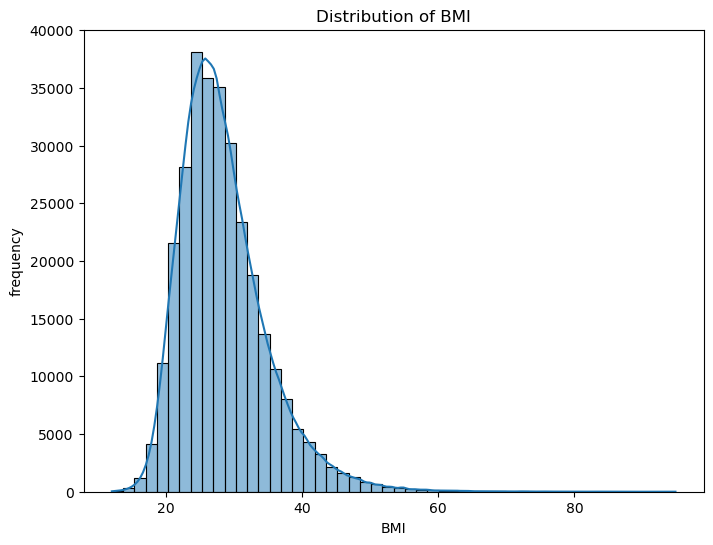

In [16]:
# let's what our BMI distribution looks like
plt.figure(figsize = (8,6))
sns.histplot(healthcare_data['BMI'], bins=50, kde=True)
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.title('Distribution of BMI')
plt.show()

The distribution is right skewed meaning that there are more lower BMI values than higher BMI values and a long tail extends towards the
higher BMI values.
This confirms the presence of outliers especially at the high end (BMI > 43).
Most people have BMI between 18 and 40 but there are extreme cases between 60 and 80

In [17]:
# we are handling this outliers using the segmentation method, we will asssign BMI categories according to the standard WHO BMI categories

bmi_bins = [0,18.5,24.9,29.9,39.9,float('inf')]
bmi_labels = ['Underweight','Normalweight','Overweight','Obese','Extremely Obese']

healthcare_data['BMICategory'] = pd.cut(healthcare_data['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)

print(healthcare_data['BMICategory'].value_counts())

BMICategory
Overweight         105585
Normalweight        88858
Obese               85531
Extremely Obese     16656
Underweight          5087
Name: count, dtype: int64


In [18]:
# How many rows adn columns remaining after cleaning
healthcare_data.shape

(301717, 19)

Hypertensive Patients by BMI Category: 
 BMICategory
Overweight         9893
Obese              8989
Normalweight       6134
Extremely Obese    1844
Underweight         401
Name: Hypertension, dtype: int64


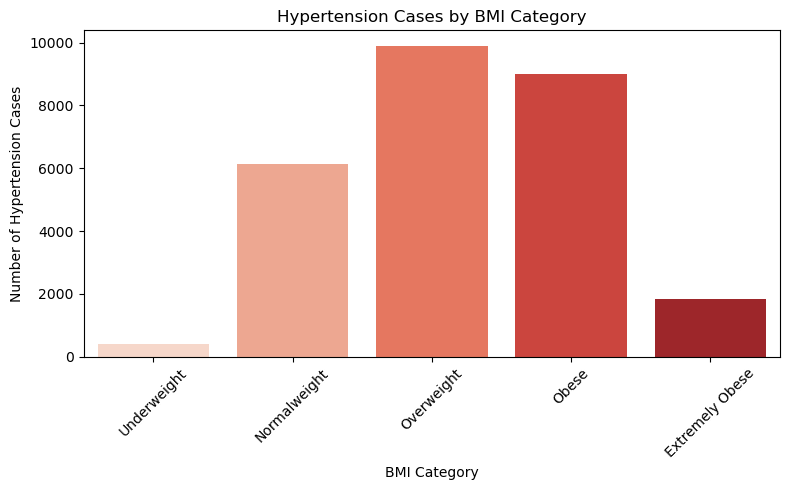

In [19]:
# Count the number of patients with hypertension in each BMI category
bmi_hypertension_counts = (healthcare_data[healthcare_data['Hypertension'] == 'Yes']
                        .groupby('BMICategory')['Hypertension']
                        .count()
                           .sort_values(ascending=False)
                          )

# Display results
print("Hypertensive Patients by BMI Category: \n", bmi_hypertension_counts)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=bmi_hypertension_counts.index, y=bmi_hypertension_counts.values, palette="Reds")
plt.xlabel("BMI Category")
plt.ylabel("Number of Hypertension Cases")
plt.title("Hypertension Cases by BMI Category")
plt.xticks(rotation=45)
plt.tight_layout() #prevents label cutoff
plt.show()


The results show a clear association between BMI categories and hypertension prevalence, with the highest number of cases occurring in **Overweight (9,893)** and **Obese (8,989)** individuals, indicating that excess weight is a significant risk factor for hypertension.

Normal weight individuals still accounted for a notable proportion of cases (6,134), suggesting that hypertension can occur even without elevated BMI, possibly due to genetic, dietary, or lifestyle factors. 

The Extremely Obese (1,844) and Underweight (401) groups had the fewest cases, though the lower numbers in the extremely obese category may reflect a smaller population size or competing health risks. 

### **Calculate Rate/BMI instead of count as this is a more measurable comparison**

BMICategory
Overweight         105585
Normalweight        88858
Obese               85531
Extremely Obese     16656
Underweight          5087
dtype: int64 

BMICategory
Extremely Obese    11.071085
Obese              10.509640
Overweight          9.369702
Underweight         7.882839
Normalweight        6.903149
dtype: float64


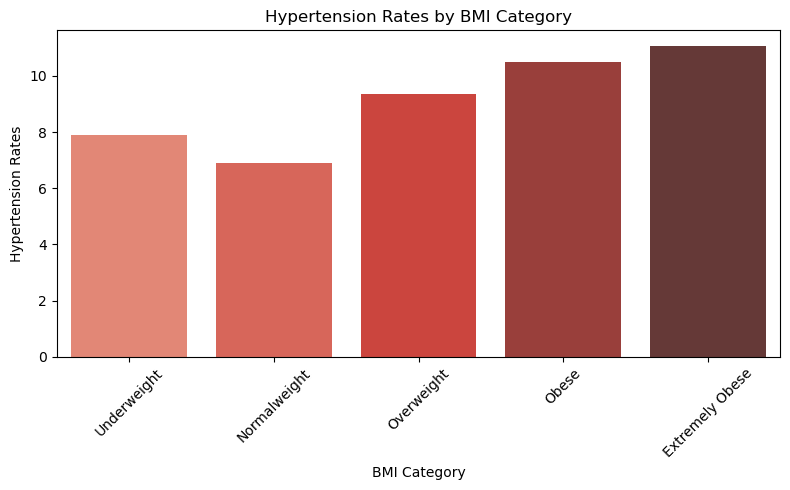

In [20]:
# Calculate hypertension prevalence rate per BMI category
total_patients_per_bmi = healthcare_data.groupby('BMICategory').size().sort_values(ascending=False)

print(total_patients_per_bmi, '\n')
hypertension_rate = (bmi_hypertension_counts / total_patients_per_bmi * 100).sort_values(ascending=False)

print(hypertension_rate)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=hypertension_rate.index, y=hypertension_rate.values, palette="Reds_d")
plt.xlabel("BMI Category")
plt.ylabel("Hypertension Rates")
plt.title("Hypertension Rates by BMI Category")
plt.xticks(rotation=45)
plt.tight_layout() #prevents label cutoff
plt.show()

Heart Disease is multifactorial.

The data reveals a strong realtionship btw hypertension prevalence tied and BMI, with rates rising sharply as weight increases. 

Extremely Obese individuals **(11.07%)** and Obese individuals **(10.51%)** show the highest hypertension rates, reinforcing the  relationship between excess weight and cardiovascular risk. 

Overweight individuals **(9.37%)** follow closely, while Underweight (7.88%) and Normal weight (6.90%) groups exhibit the lowest rates.  these categories reflect meaningful prevalence, but also suggest non-BMI factors (e.g., genetics, diet) contribute to hypertension. 

The results emphasize that obesity is a critical modifiable risk factor, but universal screening remains essential, as **no group is risk-free**. 

Hypertensive Patients by Age Category: 
 AgeCategory
18-24           130
25-29           133
30-34           226
35-39           296
40-44           486
45-49           743
50-54          1383
55-59          2199
60-64          3321
65-69          4074
70-74          4817
75-79          4027
80 or older    5426
Name: Hypertension, dtype: int64


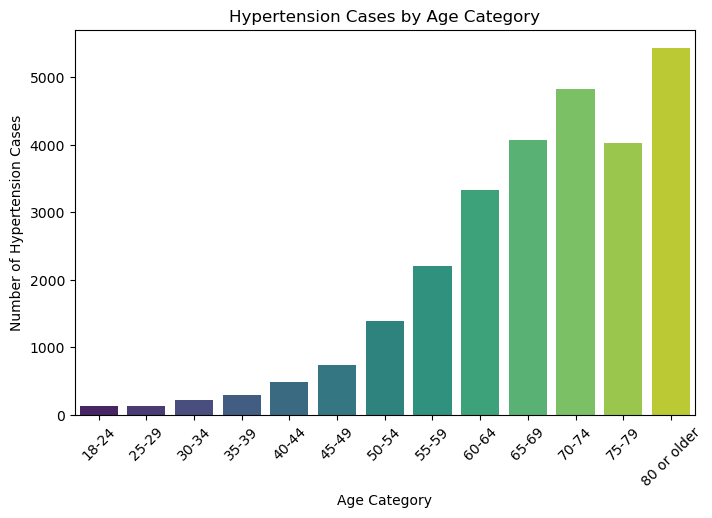

In [21]:
# Count the number of patients with hypertension in each Age category
age_hypertension_counts = healthcare_data[healthcare_data['Hypertension'] == 'Yes'].groupby('AgeCategory')['Hypertension'].count()

# Display results
print("Hypertensive Patients by Age Category: \n", age_hypertension_counts)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=age_hypertension_counts.index, y=age_hypertension_counts.values, palette="viridis")
plt.xlabel("Age Category")
plt.ylabel("Number of Hypertension Cases")
plt.title("Hypertension Cases by Age Category")
plt.xticks(rotation=45)
plt.show()

The trend indicates that hypertension prevalence increases with age, with the highest number of cases observed in individuals aged 80 and older. The number of cases is relatively low in younger age groups (18-44) but begins to rise significantly from age 50 onward, peaking in the 70-74 and 80+ age groups. This suggests that age is a strong risk factor for hypertension, emphasizing the need for early screening and preventive health measures for older adults.

### **Export the cleaned dataset for PBI analysis**

In [22]:
healthcare_data.to_csv("Hypertension_data.csv", index=False)

# **Predictive Modelling**

In [23]:
healthcare_data.head()

,Hypertension,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Tribe,BMICategory
0,No,16.60,Yes,No,No,3,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes,Yoruba,Underweight
1,No,20.34,No,No,Yes,0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No,Yoruba,Normalweight
2,No,26.58,Yes,No,No,20,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No,Yoruba,Overweight
3,No,24.21,No,No,No,0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes,Yoruba,Normalweight
4,No,23.71,No,No,No,28,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No,Yoruba,Normalweight


In [24]:
healthcare_data.columns

Index(['Hypertension', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Gender',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Tribe', 'BMICategory'],
      dtype='object')

In [25]:
# Check for data entry error or inconsistencies

print("Unique Smoking:\n", healthcare_data["Smoking"].unique(), "\n")
print("Unique AlcoholicDrinking:\n", healthcare_data["AlcoholDrinking"].unique(), "\n")
print("Unique Stroke:\n", healthcare_data["Stroke"].unique(), "\n")
print("Unique DiffWalking :\n", healthcare_data["DiffWalking"].unique(), "\n")
print("Unique Gender:\n", healthcare_data["Gender"].unique(), "\n")
print("Unique AgeCategory:\n", healthcare_data["AgeCategory"].unique(), "\n")
print("Unique Diabetic:\n", healthcare_data["Diabetic"].unique(), "\n")
print("Unique PhysicalActivity:\n", healthcare_data["PhysicalActivity"].unique(), "\n")
print("Unique GenHealth:\n", healthcare_data["GenHealth"].unique(), "\n")
print("Unique Asthma:\n", healthcare_data["Asthma"].unique(), "\n")
print("Unique KidenyDisease:\n", healthcare_data["KidneyDisease"].unique(), "\n")
print("Unique Skincancer:\n", healthcare_data["SkinCancer"].unique(), "\n")
print("Unique Tribe:\n", healthcare_data["Tribe"].unique(), "\n")
print("Unique Hypertension:\n", healthcare_data["Hypertension"].unique(), "\n")
print("Unique BMICategory:\n", healthcare_data["BMICategory"].unique(), "\n")

Unique Smoking:
 ['Yes' 'No'] 

Unique AlcoholicDrinking:
 ['No' 'Yes'] 

Unique Stroke:
 ['No' 'Yes'] 

Unique DiffWalking :
 ['No' 'Yes'] 

Unique Gender:
 ['Female' 'Male'] 

Unique AgeCategory:
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Unique Diabetic:
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

Unique PhysicalActivity:
 ['Yes' 'No'] 

Unique GenHealth:
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Unique Asthma:
 ['Yes' 'No'] 

Unique KidenyDisease:
 ['No' 'Yes'] 

Unique Skincancer:
 ['Yes' 'No'] 

Unique Tribe:
 ['Yoruba' 'Hausa Fulani' 'Ibibio' 'Tiv' 'Other' 'Igbo'] 

Unique Hypertension:
 ['No' 'Yes'] 

Unique BMICategory:
 ['Underweight', 'Normalweight', 'Overweight', 'Obese', 'Extremely Obese']
Categories (5, object): ['Underweight' < 'Normalweight' < 'Overweight' < 'Obese' < 'Extremely Obese'] 



In [26]:
# Assign a shorter name to our dataset for easy fetching
data = healthcare_data
data.head()

,Hypertension,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Tribe,BMICategory
0,No,16.60,Yes,No,No,3,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes,Yoruba,Underweight
1,No,20.34,No,No,Yes,0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No,Yoruba,Normalweight
2,No,26.58,Yes,No,No,20,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No,Yoruba,Overweight
3,No,24.21,No,No,No,0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes,Yoruba,Normalweight
4,No,23.71,No,No,No,28,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No,Yoruba,Normalweight


Hypertension Distribution 

Axes(0.125,0.11;0.775x0.77)


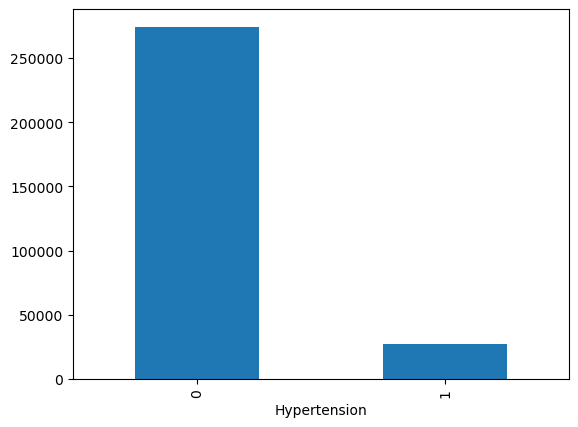

In [27]:
# Convert Target values to binary
data['Hypertension'] = data['Hypertension'].map({'Yes' : 1,'No' : 0})

# Check the distribution of the target vaaraible
print('Hypertension Distribution \n')
print(data['Hypertension'].value_counts().plot(kind='bar'))

We have a **class imbalance problem**. This means our model might become biased toward predicting "No Hypertension" because it's seen many more examples of that class. 

## **Encoding Categorical Variables**

In [29]:
# List of categorical columns to encode
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
                   'Gender', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
                   'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 
                   'Tribe', 'BMICategory']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

#Print Encoded Samples
print('Encoded Label Sample:')
print(data.head())

Encoded Label Sample:
   Hypertension    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Gender  AgeCategory  Diabetic  PhysicalActivity  \
0          30.0            0       0            7         2                 1   
1           0.0            0       0           12         0                 1   
2          30.0            0       1            9         2                 1   
3           0.0            0       0           11         0                 0   
4           0.0            1       0            4         0                 1   

   GenHealth  SleepTime  Asthma  K

## **Separate X and Y, and Split dataset to test and train set**

In [30]:
# Seperating the features and target variabk
X = data.drop('Hypertension', axis=1)
y = data['Hypertension']

# Splitting our data into train and test splits
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
print(X_train.shape, X_test.shape)

(241373, 18) (60344, 18)


## **Feature Scaling**: Standardizing Numerical Columns

In [32]:
# List of numerical columns to scale
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Apply Standard Scaling
scaler = StandardScaler()

# Fit and transform the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


print("\nScaled Numerical Data:")
print(X_train[numerical_cols].head())


Scaled Numerical Data:
             BMI  PhysicalHealth  MentalHealth  SleepTime
176113  0.474667       -0.439058     -0.137842  -0.056883
6984   -1.067100       -0.439058     -0.506526   0.625866
207892  0.539616        1.277402     -0.506526   0.625866
260064 -0.600086       -0.439058     -0.506526  -0.056883
45725   1.359212        0.051359     -0.506526  -0.056883


## **Handling Class Imbalance**

In [33]:
# Calculate class weights
classes = np.unique(y_train)
weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

print("Class weights:", class_weights)


Class weights: {0: 0.5496643347725493, 1: 5.533793388050805}


## **Training our models**

### *Logistic Regression**

In [34]:
# Create and train the model
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['No Hypertension', 'Yes Hypertension']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# Evaluate model
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test)

Logistic Regression:
                  precision    recall  f1-score   support

 No Hypertension       0.97      0.73      0.83     54892
Yes Hypertension       0.22      0.76      0.34      5452

        accuracy                           0.73     60344
       macro avg       0.59      0.75      0.59     60344
    weighted avg       0.90      0.73      0.79     60344

Confusion Matrix:
[[40154 14738]
 [ 1299  4153]]


Accuracy score is **73%**,  

True Negatives: 40,154 | **False Positives: 14,738 (false alarms)****False Negatives": 1,299 (dangerous misses**) |True positives": 4,153
A lot of false Alarms



## *Random Forest*

In [35]:
# Create and train the model
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
rf.fit(X_train, y_train)


print("\nRandom Forest:")
evaluate_model(rf, X_test, y_test)


Random Forest:
                  precision    recall  f1-score   support

 No Hypertension       0.92      0.98      0.95     54892
Yes Hypertension       0.32      0.09      0.15      5452

        accuracy                           0.90     60344
       macro avg       0.62      0.54      0.55     60344
    weighted avg       0.86      0.90      0.87     60344

Confusion Matrix:
[[53815  1077]
 [ 4936   516]]


Accuracy score is 90%, but recall is very low at 10%(it's terrible at detecting actual patients)

True negatives: 53,816 | **Few false positives (1,076)**
**false negatives  4,919** | true positives": Only 533



### *XGBoost*

In [36]:
# Create and train the model
xgb = XGBClassifier(scale_pos_weight=5, eval_metric='logloss')
xgb.fit(X_train, y_train)

print("\nXGBoost:")
evaluate_model(xgb, X_test, y_test)


XGBoost:
                  precision    recall  f1-score   support

 No Hypertension       0.95      0.86      0.91     54892
Yes Hypertension       0.29      0.58      0.39      5452

        accuracy                           0.84     60344
       macro avg       0.62      0.72      0.65     60344
    weighted avg       0.89      0.84      0.86     60344

Confusion Matrix:
[[47287  7605]
 [ 2270  3182]]


Accuracy Score is 84%, with a recall of 58%(more balanced)


True negatives: 47,287 | **False positives: 7,605**
**False negatives 2,270** | True positives: 3,182
    
Best For actually finding hypertensive patients (least dangerous misses).


**While Random Forest had higher accuracy, it failed to detect 90% of hypertension cases—which is dangerous in healthcare. XGBoost, with its focus on recall and built-in imbalance handling, identified 58% of at-risk patients while maintaining reasonable precision. For early disease detection, catching true cases is more critical than overall accuracy**

## **Feature Importance**

             Feature  Importance
0                BMI    0.237233
8        AgeCategory    0.195208
12         SleepTime    0.085240
11         GenHealth    0.072360
4     PhysicalHealth    0.066525
5       MentalHealth    0.054895
9           Diabetic    0.038901
6        DiffWalking    0.038707
17       BMICategory    0.032902
16             Tribe    0.031712
7             Gender    0.025641
3             Stroke    0.025571
10  PhysicalActivity    0.020393
1            Smoking    0.020164
13            Asthma    0.016736
15        SkinCancer    0.014623
14     KidneyDisease    0.013445
2    AlcoholDrinking    0.009743


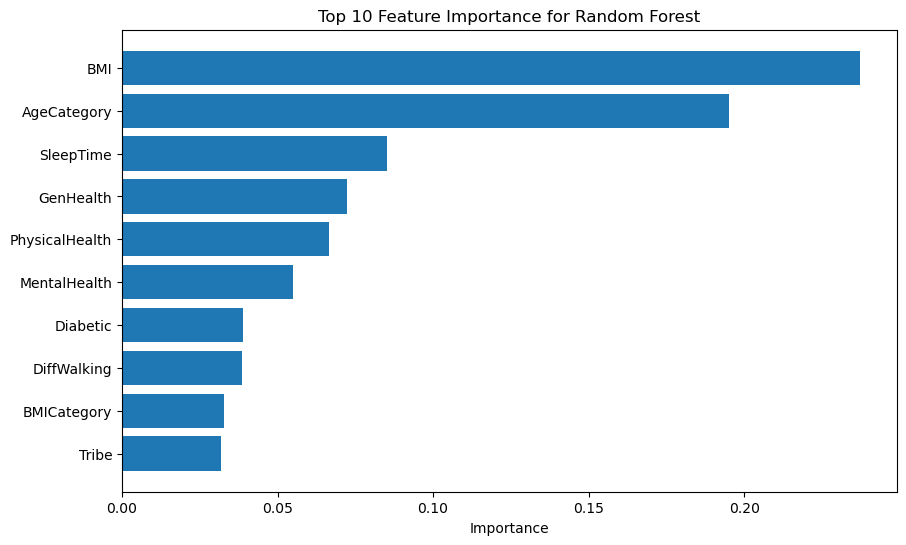

In [37]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance for Random Forest')
plt.gca().invert_yaxis() 
plt.show()

### **Feature importance for logistic regression**

Logistic Regression Feature Importance:
             Feature  Coefficient  Absolute_Coefficient
3             Stroke     1.277904              1.277904
14     KidneyDisease     0.745649              0.745649
7             Gender     0.742073              0.742073
1            Smoking     0.439307              0.439307
6        DiffWalking     0.433655              0.433655
13            Asthma     0.343169              0.343169
8        AgeCategory     0.301137              0.301137
9           Diabetic     0.300935              0.300935
2    AlcoholDrinking    -0.272620              0.272620
4     PhysicalHealth     0.200530              0.200530
0                BMI     0.106463              0.106463
5       MentalHealth     0.093769              0.093769
15        SkinCancer     0.076236              0.076236
10  PhysicalActivity    -0.075737              0.075737
12         SleepTime    -0.050747              0.050747
16             Tribe     0.038728              0.038728
17      

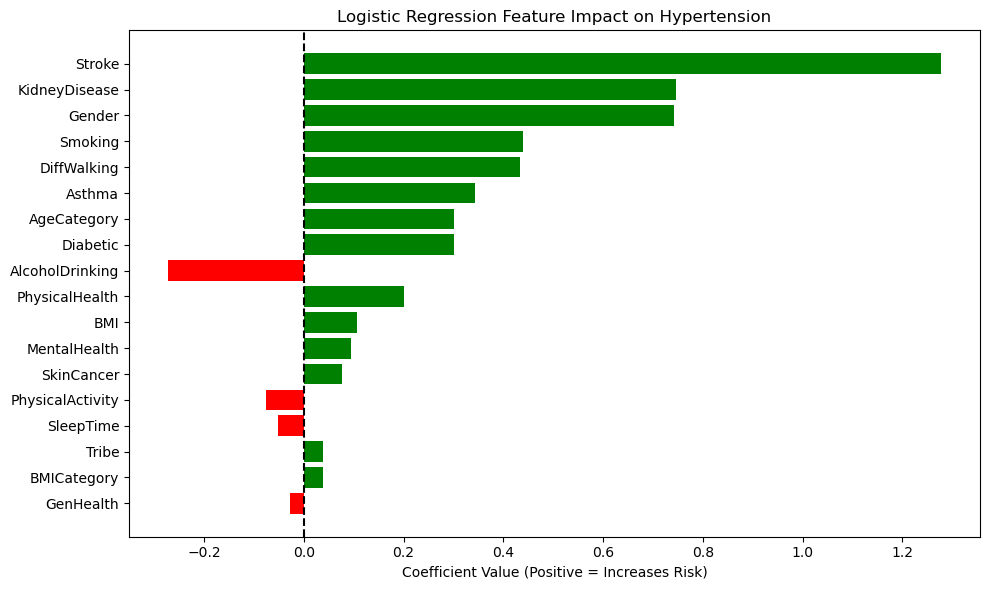

In [40]:
# Extract Feature Importance  for logistic regression
# Get coefficients
coefficients = lr.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)  # For magnitude
}).sort_values('Absolute_Coefficient', ascending=False)

print("Logistic Regression Feature Importance:")
print(feature_importance)

#Visualize ------------------------------------------------------
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], 
        feature_importance['Coefficient'],
        color=np.where(feature_importance['Coefficient'] > 0, 'green', 'red'))
plt.axvline(0, color='black', linestyle='--')  # Zero line
plt.title("Logistic Regression Feature Impact on Hypertension")
plt.xlabel("Coefficient Value (Positive = Increases Risk)")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

### **Top features for XGBoost**


 XGBOOST FEATURE IMPORTANCE 
             Feature  XGB Importance
6        DiffWalking        0.201469
3             Stroke        0.174750
8        AgeCategory        0.169496
7             Gender        0.102569
11         GenHealth        0.083605
14     KidneyDisease        0.060708
9           Diabetic        0.045728
1            Smoking        0.040950
4     PhysicalHealth        0.024916
13            Asthma        0.014359
16             Tribe        0.014026
2    AlcoholDrinking        0.012673
12         SleepTime        0.009733
5       MentalHealth        0.009469
0                BMI        0.009404
15        SkinCancer        0.009303
10  PhysicalActivity        0.008812
17       BMICategory        0.008031


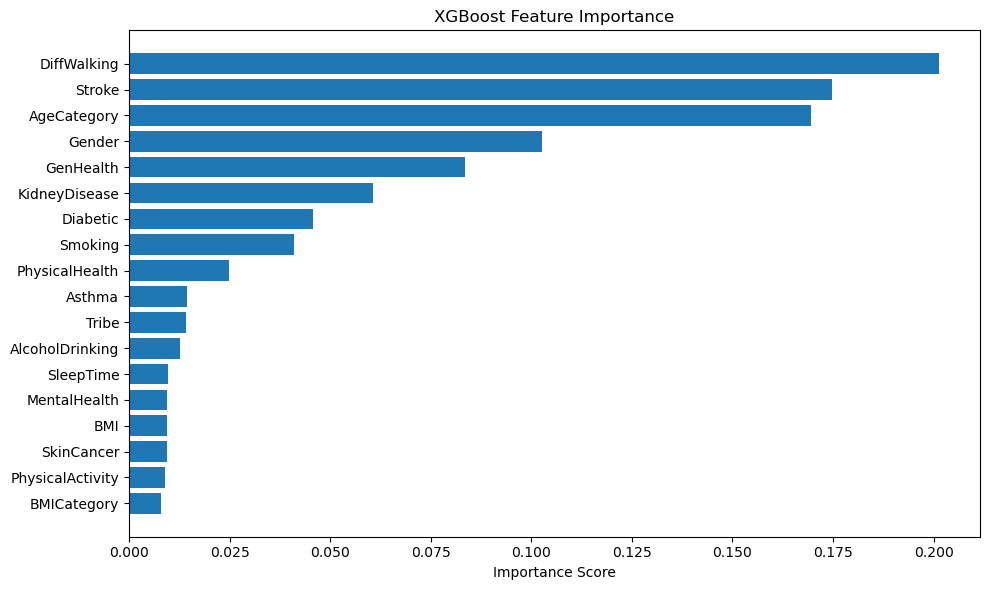

In [41]:
# line demarcation
print("\n" + "="*50)
print(" XGBOOST FEATURE IMPORTANCE ")
print("="*50)

xgb = XGBClassifier(scale_pos_weight=5, random_state=42)
xgb.fit(X, y)


# Create DataFrame for XGB importance
feature_names = X.columns
xgb_importance = pd.DataFrame({
    "Feature": feature_names,
    "XGB Importance": xgb.feature_importances_
}).sort_values("XGB Importance", ascending=False)

print(xgb_importance)

# Plot XGB importance
plt.figure(figsize=(10,6))
plt.barh(xgb_importance['Feature'], xgb_importance['XGB Importance'])
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## **Combined importance from the 3 models**

 COMBINED FEATURE IMPORTANCE COMPARISON 
           Feature  Logistic Regression  Random Forest   XGBoost
0              BMI             0.083311       1.000000  0.046679
8      AgeCategory             0.235649       0.822856  0.841299
12       SleepTime             0.039711       0.359311  0.048310
11       GenHealth             0.021476       0.305018  0.414978
4   PhysicalHealth             0.156921       0.280419  0.123670
5     MentalHealth             0.073377       0.231396  0.046999
9         Diabetic             0.235491       0.163978  0.226973
6      DiffWalking             0.339349       0.163162  1.000000
17     BMICategory             0.029992       0.138690  0.039862
16           Tribe             0.030306       0.133676  0.069621


<Figure size 1200x600 with 0 Axes>

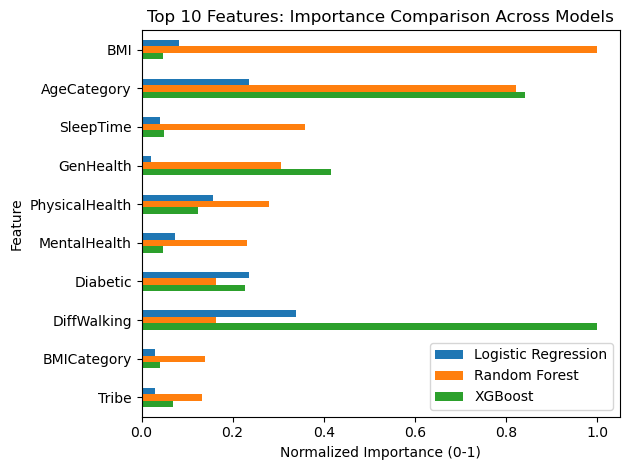

In [42]:
# let's get all importance scores in one DataFrame
combined_importance = pd.DataFrame({
    'Feature': X.columns,
    'Logistic Regression': np.abs(lr.coef_[0]),  # Use absolute values
    'Random Forest': rf.feature_importances_,
    'XGBoost': xgb.feature_importances_
})

# Normalize scores to 0-1 range for fair comparison
combined_importance['Logistic Regression'] = combined_importance['Logistic Regression'] / combined_importance['Logistic Regression'].max()
combined_importance['Random Forest'] = combined_importance['Random Forest'] / combined_importance['Random Forest'].max()
combined_importance['XGBoost'] = combined_importance['XGBoost'] / combined_importance['XGBoost'].max()

# Sort by Random Forest importance 
combined_importance = combined_importance.sort_values('Random Forest', ascending=False)

print("="*50)
print(" COMBINED FEATURE IMPORTANCE COMPARISON ")
print("="*50)
print(combined_importance.head(10))  

# ------------Visualization------------
plt.figure(figsize=(12, 6))
combined_importance.head(10).set_index('Feature').plot(kind='barh')
plt.title("Top 10 Features: Importance Comparison Across Models")
plt.xlabel("Normalized Importance (0-1)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

From running these 3 models, we can say that our most important features for prediction of heart diesease are :

**BMI,
Age Category,
Sleeptime,
Genhealth,
Physicalhealth,
Mentalhealth,
Diabetic,
difficulty walking,
BMI Category(not so much),
Tribe(not so much)**

## *Save the Best Model*

In [43]:
import joblib

# Save the model and scaler
joblib.dump(rf, 'hypertension_model.pkl') 
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']